In [1]:
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

from utils import *

In [ ]:
# path = 'ns3NewData_/kpis_rand_maxbuff2500_01ms_ISD150_0speed_NewPL_20UEs.csv'
path = 'real_world_data/data_ready_ML.csv'
dfx = pd.read_csv(path).dropna()
dfx.drop(columns='PDCP_Thruput_DL', inplace =True)

df = dfx.copy()

# Create Binned Data as states 0,1,2,3 
df_binned = data_binning(df, binning_type = 1, bin_all_params = True)

# Remove non-binned (real) data
df = df_binned.copy()
df.drop(columns=['RSRP', 'RSRQ', 'RSSI'], inplace = True)
col_vector_P_matrix = ['RSRP_binned', 'RSRQ_binned', 'RSSI_binned', 'PCC_SINR_binned', 'PCC_PHY_Thruput_DL_binned']

Prob_matrix = create_Prob_matrix(df, col_vector_P_matrix)
Prob_matrix

In [ ]:
df_binned.corr()

In [ ]:
# dfx.drop(columns = 'PDCP_Thruput_DL', inplace = True)
# _ = dfx[['RSRP', 'RSRQ', 'RSSI']].plot(kind = 'hist', bins = 100, subplots = True, figsize = (20,10))
# _ = dfx[['PCC_SINR']].plot(kind = 'hist', bins = 10, subplots = True, figsize = (5,5))
_ = dfx[['PCC_PHY_Thruput_DL']].plot(kind = 'hist', bins = 10, subplots = True, figsize = (5,5))

In [ ]:
Prob_matrix['RSRP x RSRQ'] = Prob_matrix['P(RSRP_binned)']*Prob_matrix['P(RSRQ_binned)']

In [ ]:
Prob_matrix['RSRP x RSRQ'] = Prob_matrix['P(RSRP_binned)']*Prob_matrix['P(RSRQ_binned)']
Prob_matrix

In [ ]:
df = df_binned.copy()
plt.figure()
plt.scatter(df.RSRP_binned.values, df.RSRP.values)
plt.title('RSRP')

plt.figure()
plt.scatter(df.PCC_SINR_binned.values, df.PCC_SINR)
plt.title('SINR')

plt.figure()
plt.scatter(df.PCC_PHY_Thruput_DL_binned.values, df.PCC_PHY_Thruput_DL)
plt.title('Thruput')

In [ ]:
print(df['PCC_SINR_binned'].value_counts())
A = df.PCC_SINR.plot(kind = 'hist', bins = 4)

In [ ]:
df_prob = df.copy()

def cal_Ind_Prob(arr):
    df_temp = df[df.PCC_SINR_binned == 0]
    len[df_temp]/len(df)
    

In [ ]:
df_temp = df[df.PCC_SINR_binned == 3]
len(df_temp)/len(df)

In [ ]:
df['RSRP_binned'].value_counts()

# Trying to segmentize RSRP RSSI, RSRQ based on channel conditions.
In the part above, we segmentize using pd.cut(). But in the following, there are some RF-rules based on which awe segmentize the RSRP,RSRQ and SINR.

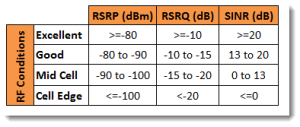

### N_RBs = RSRQ*RSSI/RSRP

In [2]:
# path = 'ns3NewData_/kpis_rand_maxbuff2500_01ms_ISD150_0speed_NewPL_20UEs.csv'
path = 'real_world_data/data_ready_ML.csv'
dfx = pd.read_csv(path).dropna()
dfx.drop(columns='PDCP_Thruput_DL', inplace =True)

# N = RSRQ*RSSI/RSRP => RSRQ+RSSI - RSRP
N = np.ceil(dfx['RSRQ']+dfx['RSSI']-dfx['RSRP']).astype(int)
dfx.insert(0, 'N_RBs', N)

# RSSI_new = dfx.RSRP - dfx.RSRQ # Removing the number of RBs. 
# dfx.insert(4, 'RSSI_new', RSSI_new)

dfx.head()

,N_RBs,RSRP,RSRQ,RSSI,PCC_SINR,PCC_PHY_Thruput_DL
0,15,-70.77,-8.66,-48.02,7.83,8737.41
1,15,-72.40,-10.56,-47.17,4.95,6969.09
2,15,-71.32,-10.13,-47.11,5.65,3874.06
3,15,-69.92,-9.62,-46.18,6.95,5575.82
4,15,-72.43,-10.30,-47.74,4.28,6114.99


In [ ]:
dfx.plot(x = 'RSRP', y = 'RSSI', kind = 'scatter')

In [ ]:
dfx.PCC_PHY_Thruput_DL.plot(kind = 'hist', bins = 50)